Importing the essential Python libraries for data processing, visualization, and machine learning

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Load the Email dataset from a CSV file and display the first few rows

In [227]:
df=pd.read_csv(r"C:\Users\fahim\Downloads\email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Display dataset structure, column types, and non-null counts


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Checking for NULL values

In [229]:
df.isna().sum()

Category    0
Message     0
dtype: int64

Convert all text columns to lowercase for uniformity

In [230]:
df[df.columns]=df[df.columns].apply(lambda x: x.str.lower())
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


Checking for duplicate values

In [231]:
df.duplicated().sum()

416

Removing duplicate values

In [232]:
df.drop_duplicates(inplace=True)

In [233]:
df.duplicated().sum()

0

Convert categorical labels to numerical values: Ham as 0 and Spam as 1

In [234]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

Feature extraction, defining features (`x`) as messages and target labels (`y`) as categories.

In [235]:
x=df['Message']
y=df['Category']

In [236]:
x.head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [237]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

Split the data into training and testing sets (75% train, 25% test)

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

In [239]:
x_train.info()

<class 'pandas.core.series.Series'>
Index: 3867 entries, 204 to 1748
Series name: Message
Non-Null Count  Dtype 
--------------  ----- 
3867 non-null   object
dtypes: object(1)
memory usage: 60.4+ KB


In [240]:
x_test.info()

<class 'pandas.core.series.Series'>
Index: 1289 entries, 464 to 2016
Series name: Message
Non-Null Count  Dtype 
--------------  ----- 
1289 non-null   object
dtypes: object(1)
memory usage: 20.1+ KB


Convert cleaned text into numerical features using the TF-IDF technique

In [241]:
feature_extraction=TfidfVectorizer(min_df=1, stop_words="english")
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

Train a Logistic Regression model using the training features and labels with a fixed random state for reproducibility


In [242]:
classifier=LogisticRegression(random_state=3)
classifier.fit(x_train_features,y_train)

LogisticRegression(random_state=3)

Predict training labels using the classifier and calculate the training accuracy score


In [243]:
y_train_pred=classifier.predict(x_train_features)
acc=accuracy_score(y_train,y_train_pred)
acc

0.9619860356865787

Predict test labels using the classifier and compute the accuracy score on the test data


In [244]:
y_pred=classifier.predict(x_test_features)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.948021722265322

Generate and display the confusion matrix for test predictions with labeled rows and columns


In [250]:
cm =confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual_Ham', 'Actual_Spam'], columns=['Pred_Ham', 'Pred_Spam'])
print(cm_df)

             Pred_Ham  Pred_Spam
Actual_Ham       1119          4
Actual_Spam        63        103


Visualize the confusion matrix using a heatmap with annotations and axis labels

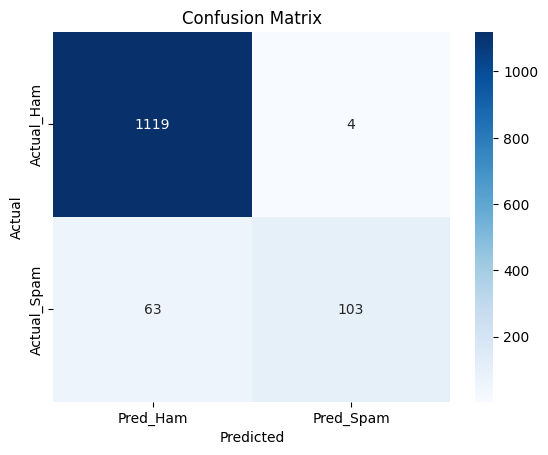

In [247]:
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Classify a new email as spam or ham using the trained model


In [251]:
input_mail=["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"]
input_mail_features=feature_extraction.transform(input_mail)
prediction=classifier.predict(input_mail_features)
if prediction[0]==0:
    print("Ham mail")
else:
    print("Spam mail")

Spam mail
